# Airline Fair Prediction 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Reading the Airline Dataset using pandas

In [2]:
train_data=pd.read_excel('Data_Train.xlsx')

In [3]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
train_data.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [6]:
train_data.shape

(10683, 11)

In [7]:
train_data[train_data['Total_Stops'].isna()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


In [8]:
train_data.dropna(inplace=True)

In [9]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

Lets Pre Process & perform Featurization on Data_of_Journey

In [10]:
data=train_data.copy()

In [11]:
data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662


In [12]:
data.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [13]:
#Changing to datatype to datatime
def change_into_datetime(col):
    data[col]=pd.to_datetime(data[col])

In [14]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [15]:
for feature in ['Date_of_Journey', 'Dep_Time', 'Arrival_Time']:
    change_into_datetime(feature)

/home/revanth/anaconda3/lib/python3.9/site-packages/pandas/core/tools/datetimes.py:1047: UserWarning: Parsing '24/03/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
/home/revanth/anaconda3/lib/python3.9/site-packages/pandas/core/tools/datetimes.py:1047: UserWarning: Parsing '24/06/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
/home/revanth/anaconda3/lib/python3.9/site-packages/pandas/core/tools/datetimes.py:1047: UserWarning: Parsing '27/05/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
/home/revanth/anaconda3/lib/python3.9/site-packages/pandas/core/tools/datetimes.py:1047: UserWarning: Parsing '18/04/2019' in DD/MM/Y

In [16]:
data.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

In [17]:
data['Date_of_Journey'].min()

Timestamp('2019-01-03 00:00:00')

In [18]:
data['Date_of_Journey'].max()

Timestamp('2019-12-06 00:00:00')

In [19]:
data['journay_day']=data['Date_of_Journey'].dt.day

In [20]:
data['journay_month']=data['Date_of_Journey'].dt.month

In [21]:
data['journay_year']=data['Date_of_Journey'].dt.year

In [22]:
data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journay_day,journay_month,journay_year
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2023-03-19 22:20:00,2023-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2023-03-19 05:50:00,2023-03-19 13:15:00,7h 25m,2 stops,No info,7662,5,1,2019


Perform Data cleaning and feature Engineering

In [23]:
data.drop('Date_of_Journey',axis=1,inplace=True)

In [24]:
data.head(2)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journay_day,journay_month,journay_year
0,IndiGo,Banglore,New Delhi,BLR → DEL,2023-03-19 22:20:00,2023-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2023-03-19 05:50:00,2023-03-19 13:15:00,7h 25m,2 stops,No info,7662,5,1,2019


In [25]:
def extract_hour_min(df,col):
    df[col+"_hour"]=df[col].dt.hour
    df[col+"_min"]=df[col].dt.minute
    df.drop(col,axis=1,inplace=True)
    return df.head(4)

In [26]:
extract_hour_min(data,'Dep_Time')

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journay_day,journay_month,journay_year,Dep_Time_hour,Dep_Time_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2023-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2023-03-19 13:15:00,7h 25m,2 stops,No info,7662,5,1,2019,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2023-06-10 04:25:00,19h,2 stops,No info,13882,6,9,2019,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,2023-03-19 23:30:00,5h 25m,1 stop,No info,6218,5,12,2019,18,5


In [27]:
extract_hour_min(data,'Arrival_Time')

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journay_day,journay_month,journay_year,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,2019,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,6,9,2019,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,2019,18,5,23,30


Lets Perform Data Analysis

In [28]:
#Analyse when will most of the flights will take off
def flight_dep_time(x):
    if (x>4) and (x<=8):
        return "Early morning"
    elif(x>8) and (x<=12):
        return "Morning"
    elif (x>12) and (x<=16):
        return 'Noon'
    elif (x>16) and (x<=20):
        return "Evening"
    elif (x>20) and (x<=24):
        return "Night"
    else:
        return 'Late Night'

<AxesSubplot: >

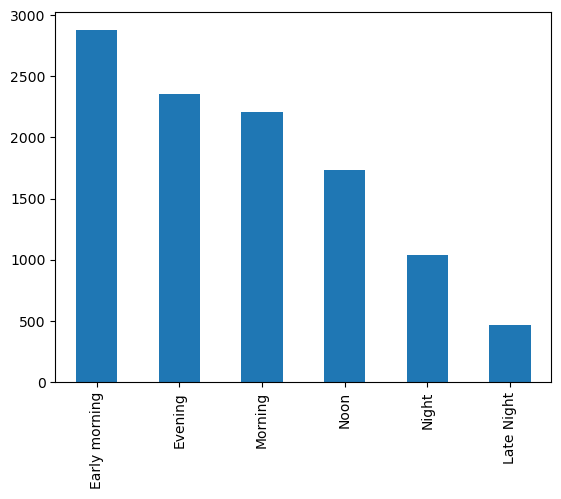

In [29]:
data['Dep_Time_hour'].apply(flight_dep_time).value_counts().plot(kind='bar')

In [30]:
import plotly
import cufflinks as cf

In [31]:
from cufflinks.offline import go_offline
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot

In [32]:
cf.go_offline()

In [33]:
data['Dep_Time_hour'].apply(flight_dep_time).value_counts().iplot(kind='bar')

Pre Process the Duration time and Duration feature

In [34]:
data.head(4)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journay_day,journay_month,journay_year,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,2019,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,6,9,2019,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,2019,18,5,23,30


In [35]:
def pre_process(x):
    if 'h' not in x:
        x='0h '+x
    elif 'm' not in x:
        x=x+' 0m'
    return x

In [36]:
int(data['Duration'][0].split(' ')[0][0:-1])

2

In [37]:
data['Duration']=data['Duration'].apply(pre_process)

In [38]:
data['Duration'][0].split(' ')[0]

'2h'

In [39]:
int(data['Duration'][0].split(' ')[1][0:-1])

50

In [40]:
data['Duration_hour']=data['Duration'].apply(lambda x: int(x.split(' ')[0][0:-1]))

In [41]:
data['Duration_min']=data['Duration'].apply(lambda x: int(x.split(' ')[1][0:-1]))

In [42]:
data.head(2)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journay_day,journay_month,journay_year,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,Duration_hour,Duration_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,2019,5,50,13,15,7,25


In [43]:
eval('2*50+1')

101

Analyze wheather  Duration impacts on price or not

In [44]:
data['Total_min']=data['Duration'].str.replace('h','*60').str.replace(' ','+').str.replace('m','*1').apply(eval)

In [45]:
data.head(3)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journay_day,journay_month,journay_year,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,Duration_hour,Duration_min,Total_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10,2,50,170
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,2019,5,50,13,15,7,25,445
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,6,9,2019,9,25,4,25,19,0,1140


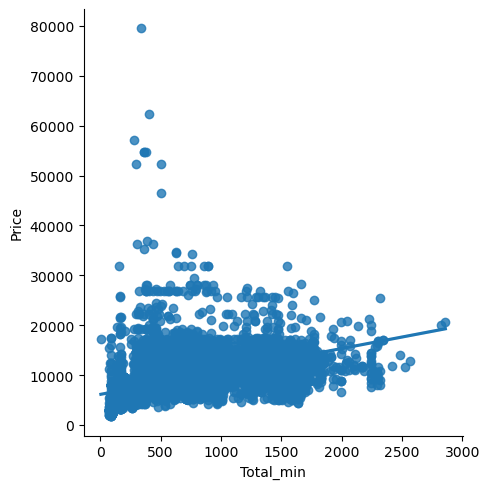

In [46]:
sns.lmplot(x='Total_min',y='Price',data=data)

Which city has maximum final destination of flights?

In [47]:
data['Destination'].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [48]:
data['Destination'].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

<AxesSubplot: ylabel='Destination'>

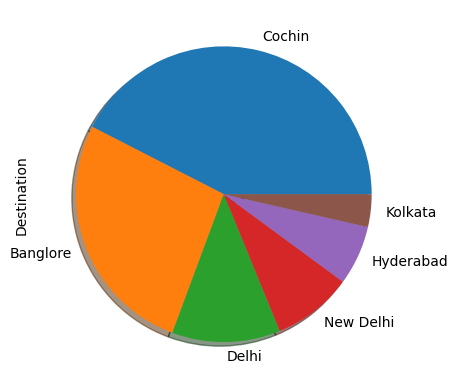

In [49]:
data['Destination'].value_counts().plot(kind='pie',shadow=True)

On which route jet airways are used

In [50]:
data['Route']

0                    BLR → DEL
1        CCU → IXR → BBI → BLR
2        DEL → LKO → BOM → COK
3              CCU → NAG → BLR
4              BLR → NAG → DEL
                 ...          
10678                CCU → BLR
10679                CCU → BLR
10680                BLR → DEL
10681                BLR → DEL
10682    DEL → GOI → BOM → COK
Name: Route, Length: 10682, dtype: object

In [51]:
data[data['Airline']=='Jet Airways'].groupby('Route').size().sort_values(ascending=False)

Route
CCU → BOM → BLR          930
DEL → BOM → COK          875
BLR → BOM → DEL          385
BLR → DEL                382
CCU → DEL → BLR          300
BOM → HYD                207
DEL → JAI → BOM → COK    207
DEL → AMD → BOM → COK    141
DEL → IDR → BOM → COK     86
DEL → NAG → BOM → COK     61
DEL → ATQ → BOM → COK     38
DEL → COK                 34
DEL → BHO → BOM → COK     29
DEL → BDQ → BOM → COK     28
DEL → LKO → BOM → COK     25
DEL → JDH → BOM → COK     23
CCU → GAU → BLR           22
DEL → MAA → BOM → COK     16
DEL → IXC → BOM → COK     13
BLR → MAA → DEL           10
BLR → BDQ → DEL            8
DEL → UDR → BOM → COK      7
BOM → DEL → HYD            5
CCU → BOM → PNQ → BLR      4
BLR → BOM → JDH → DEL      3
DEL → DED → BOM → COK      2
BOM → BDQ → DEL → HYD      2
DEL → CCU → BOM → COK      1
BOM → VNS → DEL → HYD      1
BOM → UDR → DEL → HYD      1
BOM → JDH → DEL → HYD      1
BOM → IDR → DEL → HYD      1
BOM → DED → DEL → HYD      1
dtype: int64

<AxesSubplot: xlabel='Airline', ylabel='Price'>

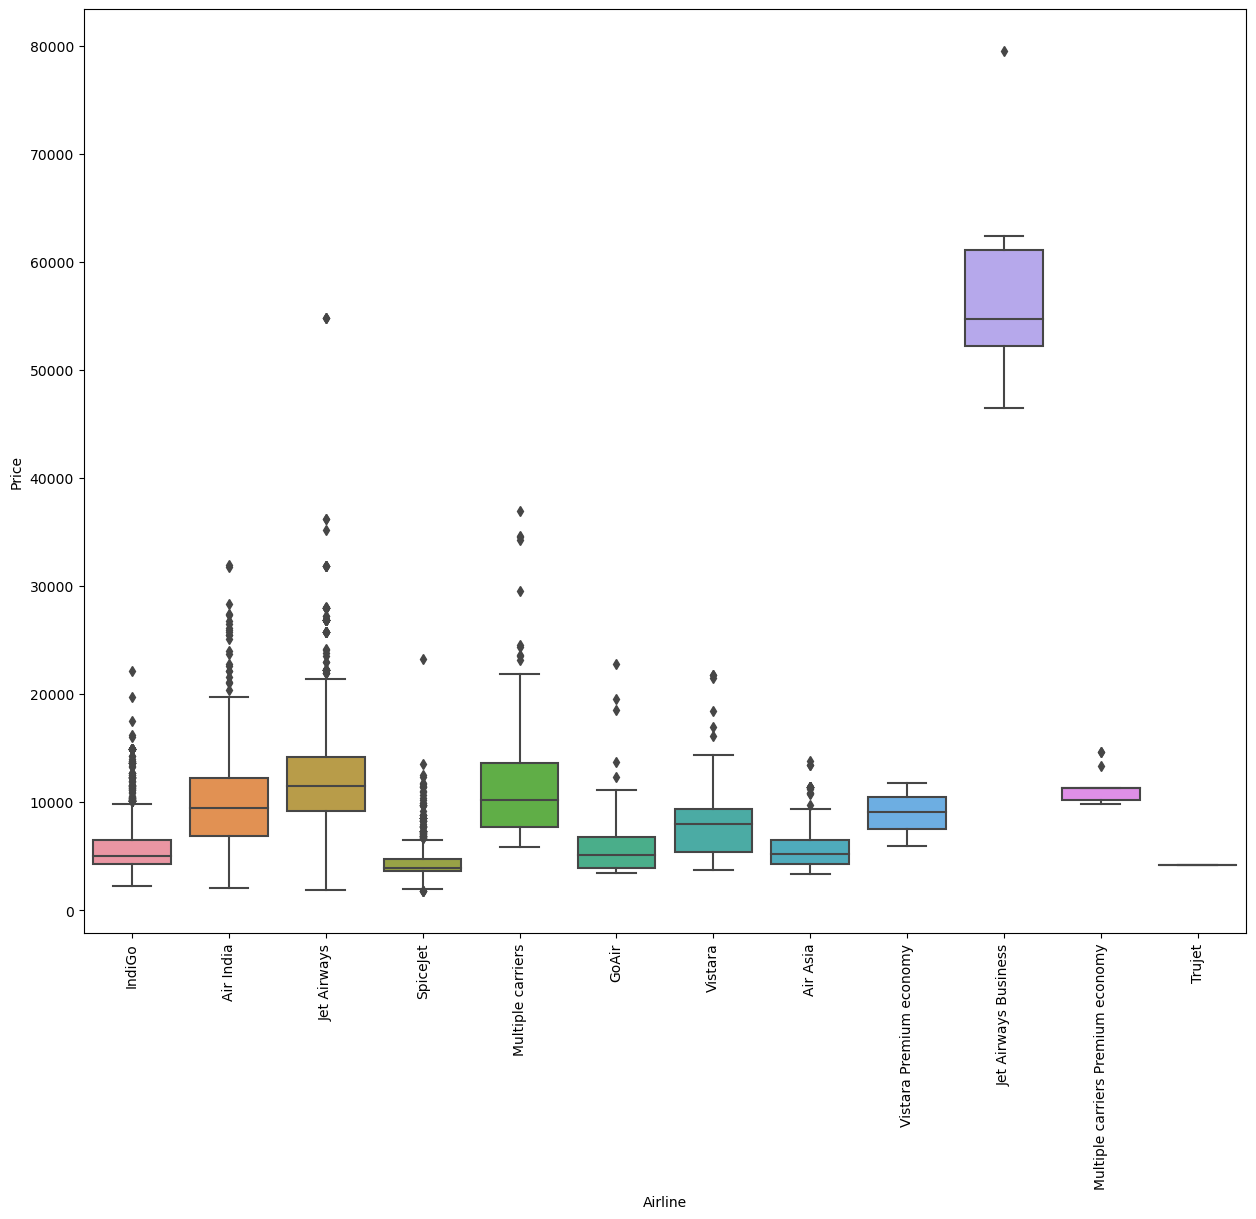

In [52]:
#Airline vs price 
plt.figure(figsize=(15,12))
plt.xticks(rotation=90)
sns.boxplot(x='Airline',y='Price',data=data)

<AxesSubplot: xlabel='Airline', ylabel='Price'>

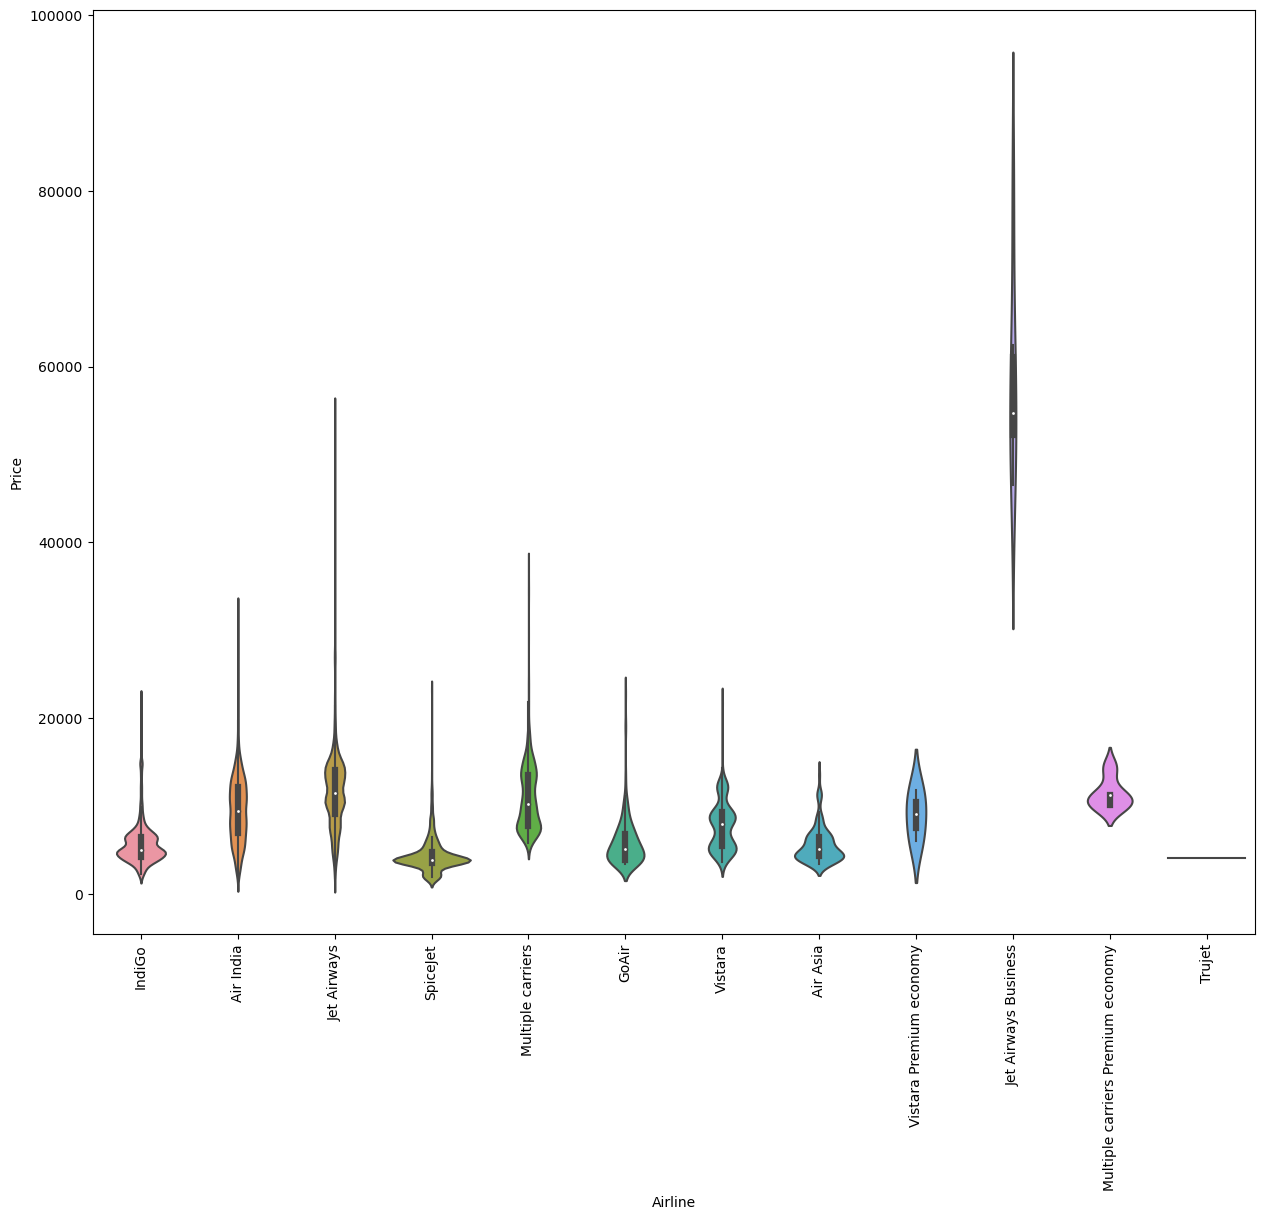

In [53]:
#Airline vs price 
plt.figure(figsize=(15,12))
plt.xticks(rotation=90)
sns.violinplot(x='Airline',y='Price',data=data)

Handle Categorical data using the one hot encoding

In [54]:
data.head(4)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journay_day,journay_month,journay_year,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,Duration_hour,Duration_min,Total_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10,2,50,170
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,2019,5,50,13,15,7,25,445
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,6,9,2019,9,25,4,25,19,0,1140
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,2019,18,5,23,30,5,25,325


In [55]:
np.round(data['Additional_Info'].value_counts()/len(data)*100,2)

No info                         78.11
In-flight meal not included     18.55
No check-in baggage included     3.00
1 Long layover                   0.18
Change airports                  0.07
Business class                   0.04
No Info                          0.03
1 Short layover                  0.01
Red-eye flight                   0.01
2 Long layover                   0.01
Name: Additional_Info, dtype: float64

In [56]:
data.drop(columns=['Additional_Info','Route','Total_min','journay_year'],axis=1,inplace=True)

In [57]:
data.head(3)

,Airline,Source,Destination,Duration,Total_Stops,Price,journay_day,journay_month,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,Duration_hour,Duration_min
0,IndiGo,Banglore,New Delhi,2h 50m,non-stop,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,7h 25m,2 stops,7662,5,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,19h 0m,2 stops,13882,6,9,9,25,4,25,19,0


In [58]:
#Feature Encoding
cat_col=[col for col in data.columns if data[col].dtype=='object']


In [59]:
num_col=[col for col in data.columns if data[col].dtype!='object']

In [60]:
from sklearn.preprocessing import OneHotEncoder

In [61]:
data['Source'].apply(lambda x:1 if x=='Banglore' else 0)

0        1
1        0
2        0
3        0
4        1
        ..
10678    0
10679    0
10680    1
10681    1
10682    0
Name: Source, Length: 10682, dtype: int64

In [62]:
for category in data['Source'].unique():
    data['Source'+category]=data['Source'].apply(lambda x : 1 if x==category else 0)

In [63]:
data.head(3)

,Airline,Source,Destination,Duration,Total_Stops,Price,journay_day,journay_month,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,Duration_hour,Duration_min,SourceBanglore,SourceKolkata,SourceDelhi,SourceChennai,SourceMumbai
0,IndiGo,Banglore,New Delhi,2h 50m,non-stop,3897,24,3,22,20,1,10,2,50,1,0,0,0,0
1,Air India,Kolkata,Banglore,7h 25m,2 stops,7662,5,1,5,50,13,15,7,25,0,1,0,0,0
2,Jet Airways,Delhi,Cochin,19h 0m,2 stops,13882,6,9,9,25,4,25,19,0,0,0,1,0,0


Lets Perform target guided encoding on data and perform manual encoding on data

In [64]:
Airlines=data.groupby(['Airline'])['Price'].mean().sort_values().index

In [65]:
Airlines

Index(['Trujet', 'SpiceJet', 'Air Asia', 'IndiGo', 'GoAir', 'Vistara',
       'Vistara Premium economy', 'Air India', 'Multiple carriers',
       'Multiple carriers Premium economy', 'Jet Airways',
       'Jet Airways Business'],
      dtype='object', name='Airline')

In [66]:
dict1={key:index for index,key,in enumerate(Airlines,0)}

In [67]:
dict1

{'Trujet': 0,
 'SpiceJet': 1,
 'Air Asia': 2,
 'IndiGo': 3,
 'GoAir': 4,
 'Vistara': 5,
 'Vistara Premium economy': 6,
 'Air India': 7,
 'Multiple carriers': 8,
 'Multiple carriers Premium economy': 9,
 'Jet Airways': 10,
 'Jet Airways Business': 11}

In [68]:
data["Airline"]=data['Airline'].map(dict1)

In [69]:
data['Airline']

0         3
1         7
2        10
3         3
4         3
         ..
10678     2
10679     7
10680    10
10681     5
10682     7
Name: Airline, Length: 10682, dtype: int64

In [70]:
data.head(2)

,Airline,Source,Destination,Duration,Total_Stops,Price,journay_day,journay_month,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,Duration_hour,Duration_min,SourceBanglore,SourceKolkata,SourceDelhi,SourceChennai,SourceMumbai
0,3,Banglore,New Delhi,2h 50m,non-stop,3897,24,3,22,20,1,10,2,50,1,0,0,0,0
1,7,Kolkata,Banglore,7h 25m,2 stops,7662,5,1,5,50,13,15,7,25,0,1,0,0,0


In [71]:
data['Destination'].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [72]:
data['Destination'].replace("New Delhi","Delhi",inplace=True)

In [73]:
data['Destination'].unique()

array(['Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Hyderabad'],
      dtype=object)

In [74]:
Dest=data.groupby(['Destination'])['Price'].mean().sort_values().index

In [75]:
dict2={key:index for index,key,in enumerate(Dest,0)}

In [76]:
dict2

{'Kolkata': 0, 'Hyderabad': 1, 'Delhi': 2, 'Banglore': 3, 'Cochin': 4}

In [77]:
data["Destination"]=data['Destination'].map(dict2)

In [78]:
data.head(2)

,Airline,Source,Destination,Duration,Total_Stops,Price,journay_day,journay_month,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,Duration_hour,Duration_min,SourceBanglore,SourceKolkata,SourceDelhi,SourceChennai,SourceMumbai
0,3,Banglore,2,2h 50m,non-stop,3897,24,3,22,20,1,10,2,50,1,0,0,0,0
1,7,Kolkata,3,7h 25m,2 stops,7662,5,1,5,50,13,15,7,25,0,1,0,0,0


In [79]:
data['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [80]:
stops={'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4}

In [81]:
data['Total_Stops']=data['Total_Stops'].map(stops)

In [82]:
data.head(2)

,Airline,Source,Destination,Duration,Total_Stops,Price,journay_day,journay_month,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,Duration_hour,Duration_min,SourceBanglore,SourceKolkata,SourceDelhi,SourceChennai,SourceMumbai
0,3,Banglore,2,2h 50m,0,3897,24,3,22,20,1,10,2,50,1,0,0,0,0
1,7,Kolkata,3,7h 25m,2,7662,5,1,5,50,13,15,7,25,0,1,0,0,0


Lets perfrom outliers detection based in these plots
1. Destribution plot
2. Histogram
3. Boxplot

In [83]:
def plot(df,col):
    fig,(ax1,ax2,ax3)=plt.subplots(3,1)
    sns.displot(df[col],ax=ax1)
    sns.boxplot(df[col],ax=ax2)
    sns.displot(df[col],ax=ax3,kde=True)

/home/revanth/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2142: UserWarning:

`displot` is a figure-level function and does not accept the ax= parameter. You may wish to try histplot.

/home/revanth/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2142: UserWarning:

`displot` is a figure-level function and does not accept the ax= parameter. You may wish to try histplot.



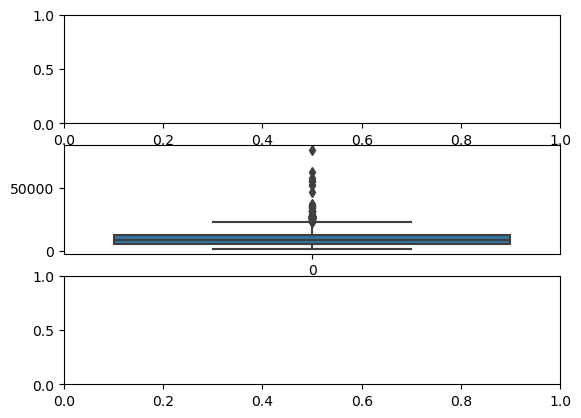

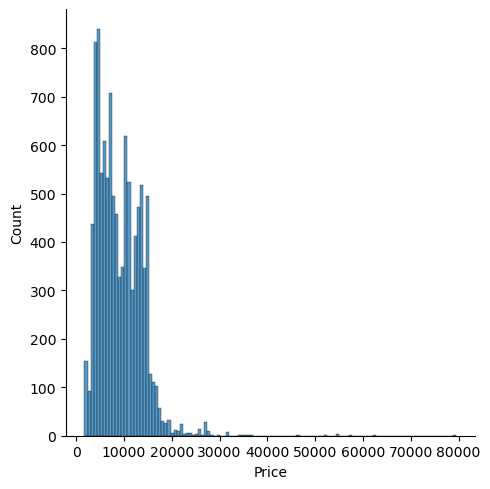

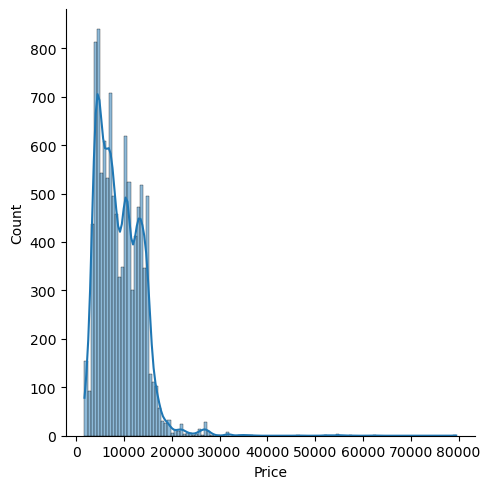

In [84]:
plot(data,'Price')

In [85]:
data['Price']=np.where(data['Price']>=35000,data['Price'].median(),data['Price'])

/home/revanth/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2142: UserWarning:

`displot` is a figure-level function and does not accept the ax= parameter. You may wish to try histplot.

/home/revanth/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2142: UserWarning:

`displot` is a figure-level function and does not accept the ax= parameter. You may wish to try histplot.



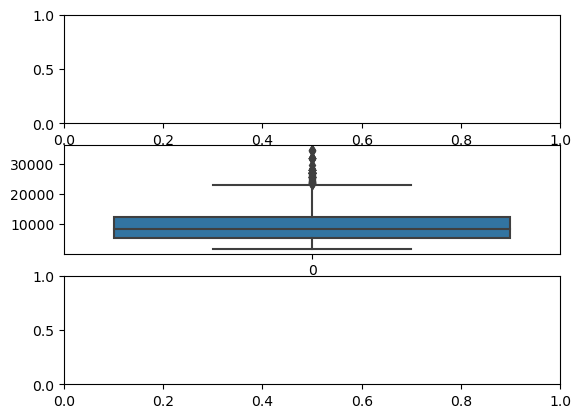

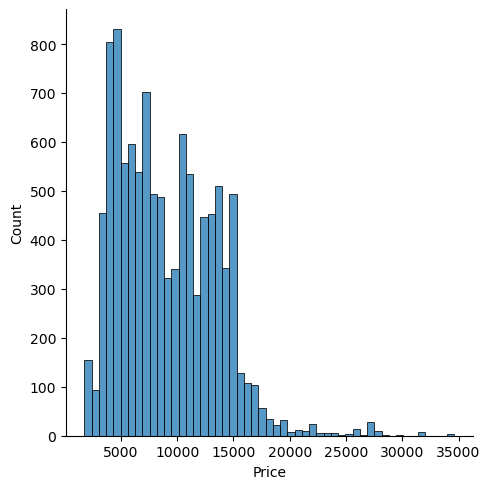

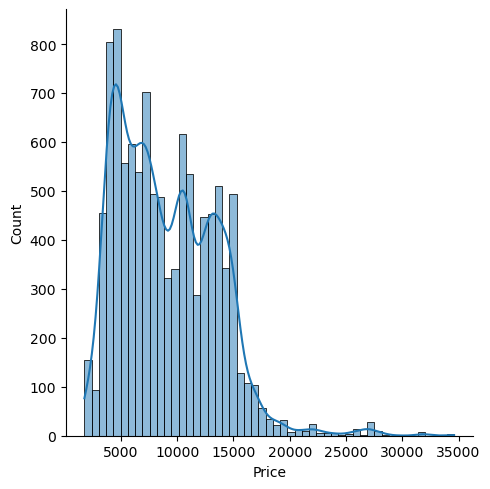

In [86]:
plot(data,'Price')

In [87]:
data.head(2)

,Airline,Source,Destination,Duration,Total_Stops,Price,journay_day,journay_month,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,Duration_hour,Duration_min,SourceBanglore,SourceKolkata,SourceDelhi,SourceChennai,SourceMumbai
0,3,Banglore,2,2h 50m,0,3897.0,24,3,22,20,1,10,2,50,1,0,0,0,0
1,7,Kolkata,3,7h 25m,2,7662.0,5,1,5,50,13,15,7,25,0,1,0,0,0


In [88]:
data.drop(['Source','Duration'],axis=1,inplace=True)

In [89]:
data.head(2)

,Airline,Destination,Total_Stops,Price,journay_day,journay_month,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,Duration_hour,Duration_min,SourceBanglore,SourceKolkata,SourceDelhi,SourceChennai,SourceMumbai
0,3,2,0,3897.0,24,3,22,20,1,10,2,50,1,0,0,0,0
1,7,3,2,7662.0,5,1,5,50,13,15,7,25,0,1,0,0,0


In [90]:
data.dtypes

Airline                int64
Destination            int64
Total_Stops            int64
Price                float64
journay_day            int64
journay_month          int64
Dep_Time_hour          int64
Dep_Time_min           int64
Arrival_Time_hour      int64
Arrival_Time_min       int64
Duration_hour          int64
Duration_min           int64
SourceBanglore         int64
SourceKolkata          int64
SourceDelhi            int64
SourceChennai          int64
SourceMumbai           int64
dtype: object

Lets Perfrom feature selection (Target Selection)
1. Select key Best (score based) for regression there is f-reg (co-relation) for mutual -info reg 

In [91]:
from sklearn.feature_selection import mutual_info_regression

In [92]:
X=data.drop(['Price'],axis=1)

In [93]:
y=data['Price']

In [94]:
X.head()

,Airline,Destination,Total_Stops,journay_day,journay_month,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,Duration_hour,Duration_min,SourceBanglore,SourceKolkata,SourceDelhi,SourceChennai,SourceMumbai
0,3,2,0,24,3,22,20,1,10,2,50,1,0,0,0,0
1,7,3,2,5,1,5,50,13,15,7,25,0,1,0,0,0
2,10,4,2,6,9,9,25,4,25,19,0,0,0,1,0,0
3,3,3,1,5,12,18,5,23,30,5,25,0,1,0,0,0
4,3,2,1,3,1,16,50,21,35,4,45,1,0,0,0,0


In [95]:
y.head()

0     3897.0
1     7662.0
2    13882.0
3     6218.0
4    13302.0
Name: Price, dtype: float64

In [96]:
X.dtypes

Airline              int64
Destination          int64
Total_Stops          int64
journay_day          int64
journay_month        int64
Dep_Time_hour        int64
Dep_Time_min         int64
Arrival_Time_hour    int64
Arrival_Time_min     int64
Duration_hour        int64
Duration_min         int64
SourceBanglore       int64
SourceKolkata        int64
SourceDelhi          int64
SourceChennai        int64
SourceMumbai         int64
dtype: object

In [97]:
mutual_info_regression(X,y)

array([0.97751841, 1.00790504, 0.78485135, 0.18873841, 0.24580026,
       0.34336579, 0.2624895 , 0.40781234, 0.3464028 , 0.47168079,
       0.34423685, 0.388153  , 0.45528712, 0.52481201, 0.13541948,
       0.20874523])

Estimate the mutual information between the columns

In [98]:
imp=pd.DataFrame(mutual_info_regression(X,y),index=X.columns)

In [99]:
imp.columns=['importance']

In [100]:
imp.sort_values(by='importance',ascending=False)

,importance
Destination,1.004433
Airline,0.976993
Total_Stops,0.791189
SourceDelhi,0.519642
Duration_hour,0.469440
SourceKolkata,0.456493
Arrival_Time_hour,0.391932
SourceBanglore,0.387756
Duration_min,0.350636
Dep_Time_hour,0.344054


Apply the Random Forest Regression and the Save the model
1. 75% Traing Data
2. 25% Testing Data

In [120]:
from sklearn.model_selection import train_test_split,RandomizedSearchCV,GridSearchCV

In [102]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [103]:
from sklearn.ensemble import RandomForestRegressor

In [104]:
rand=RandomForestRegressor()

In [105]:
model=rand.fit(X_train,y_train)

In [106]:
y_pred=model.predict(X_test)

In [107]:
y_pred.shape

(2671,)

In [108]:
import pickle

In [109]:
file=open('rf_random.pkl','wb')

In [110]:
pickle.dump(model,file)

In [111]:
M=open('rf_random.pkl','rb')

In [112]:
forest=pickle.load(M)

In [113]:
forest.predict(X_test)

array([16717.5 ,  6236.55,  8810.48, ...,  3579.93,  6333.99,  7141.98])

1. How to define your Evaluation matrix
2.  How to automate ml pipeline

In [114]:
def Mape(y_true,y_pred):
    y_true,y_pred=np.array(y_true),np.array(y_pred)
    
    return np.mean(np.abs((y_true-y_pred)/y_true))*100

In [115]:
Mape(y_test,y_pred)

13.216446265669363

1. Traing Score
2. r2 Score
3. MSME
4. MAE
5. MAPE
5. RMSE

In [116]:
def predict(ml_model):
    model=ml_model.fit(X_train,y_train)
    print("Traing Score : {}".format(model.score(X_train,y_train)))
    predictions=model.predict(X_test)
    print("Predictions are : {}".format(predictions))
    print('\n')
    from sklearn import metrics
    r2=metrics.r2_score(y_test,predictions)
    print("r2_score : {}".format(r2))
    print('MSE : {}'.format(metrics.mean_squared_error(y_test,predictions)))
    print('MAE : {}'.format(metrics.mean_absolute_error(y_test,predictions)))
    print('RMSE : {}'.format(np.sqrt(metrics.mean_squared_error(y_test,predictions))))
    print('MAPE : {}'.format(Mape(y_test,predictions)))
    sns.displot(y_test-predictions )

Traing Score : 0.951560814281721
Predictions are : [16824.88  6402.59  8800.7  ...  3537.11  6225.18  6913.79]


r2_score : 0.8057577936531315
MSE : 3781429.51129071
MAE : 1185.8061974176974
RMSE : 1944.589805406454
MAPE : 13.270208576004611


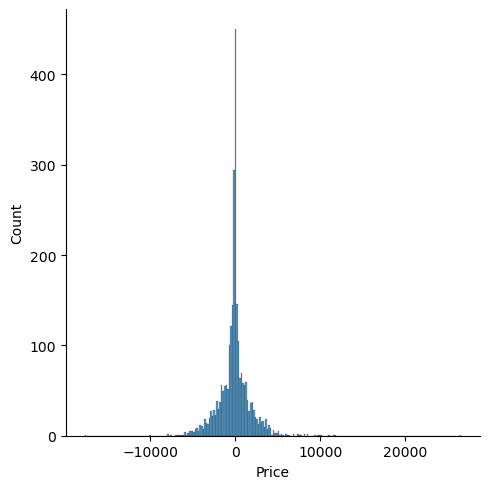

In [117]:
predict(RandomForestRegressor())

In [118]:
from sklearn.linear_model import LinearRegression,LogisticRegression

Traing Score : 0.5794483128817276
Predictions are : [12816.72571495  8820.27264273  8909.99897771 ...  4190.62345641
  9411.25977293  8261.70381625]


r2_score : 0.5557133671958718
MSE : 8649194.304132728
MAE : 2061.784107595206
RMSE : 2940.9512583741894
MAPE : 24.94861105877552


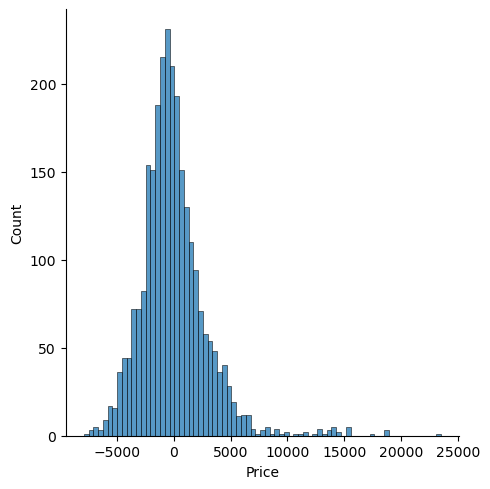

In [119]:
predict(LinearRegression())

Basic ML model 
Hyper tunnig the model
1. Randomized search
2. Grid search cv


In [122]:
reg_rf=RandomForestRegressor()

In [123]:
np.linspace(start=100,stop=1200,num=6)

array([ 100.,  320.,  540.,  760.,  980., 1200.])

In [125]:
n_estimators=[int(x) for x in np.linspace(start=1000,stop=1200,num=6)]

In [126]:
max_features=['auto','sqrt']
max_dept=[int(x) for x in np.linspace(start=5,stop=30,num=4)]
min_sample_split=[5,10,15,100]

In [127]:
random_grid={
    'n_estimators':n_estimators,
    'max_features':max_features,
    'max_depth':max_dept,
    'min_samples_split':min_sample_split
}

In [128]:
random_grid

{'n_estimators': [1000, 1040, 1080, 1120, 1160, 1200],
 'max_features': ['auto', 'sqrt'],
 'max_depth': [5, 13, 21, 30],
 'min_samples_split': [5, 10, 15, 100]}

In [129]:
random_rf=RandomizedSearchCV(reg_rf,param_distributions=random_grid,cv=3,verbose=2,n_jobs=-1)

In [130]:
random_rf.fit(X_train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [5, 13, 21, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_split': [5, 10, 15, 100],
                                        'n_estimators': [1000, 1040, 1080, 1120,
                                                         1160, 1200]},
                   verbose=2)

In [131]:
random_rf.best_params_

{'n_estimators': 1080,
 'min_samples_split': 15,
 'max_features': 'auto',
 'max_depth': 13}

In [132]:
pred2=random_rf.predict(X_test)

In [133]:
pred2

array([16959.32389643,  6274.06738604,  8593.00113596, ...,
        3962.93730801,  7384.42545333,  7067.76222907])

In [134]:
from sklearn import metrics

In [135]:
metrics.r2_score(y_test,pred2)

0.8290283097939681

[CV] END max_depth=13, max_features=auto, min_samples_split=15, n_estimators=1080; total time=  16.9s
[CV] END max_depth=5, max_features=auto, min_samples_split=100, n_estimators=1120; total time=   8.8s
[CV] END max_depth=30, max_features=sqrt, min_samples_split=5, n_estimators=1120; total time=   8.7s
[CV] END max_depth=13, max_features=sqrt, min_samples_split=5, n_estimators=1080; total time=   7.1s
[CV] END max_depth=13, max_features=auto, min_samples_split=15, n_estimators=1080; total time=  16.1s
[CV] END max_depth=21, max_features=sqrt, min_samples_split=10, n_estimators=1080; total time=   7.3s
[CV] END max_depth=21, max_features=sqrt, min_samples_split=15, n_estimators=1000; total time=   6.3s
[CV] END max_depth=13, max_features=auto, min_samples_split=15, n_estimators=1080; total time=  17.4s
[CV] END max_depth=21, max_features=auto, min_samples_split=15, n_estimators=1080; total time=  19.2s
[CV] END max_depth=30, max_features=sqrt, min_samples_split=10, n_estimators=1160; t